# Minimum Spanning Tree (MST)

**NOTA**: Para esta tarea, es posible utilizar las funciones de la tarea anterior para definir y graficar un grafo.

In [ ]:
from graphviz import Graph, Digraph
from IPython.display import display


def plotear_grafica(G, color = {}):
        grafica = Graph(graph_attr = {'size':'4'})
        for vertice in G:
            if not vertice in color or color[vertice] == 'white':
                grafica.node(vertice)
            else:
                if color[vertice] == 'black':
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice], 
                                 fontcolor = 'white')
                else:
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice])
        for n1 in G:
            for n2 in G[n1]:
                if n1 < n2:
                    grafica.edge(n1, n2)
        display(grafica)

def plotear_graficad(p):
        grafica = Digraph(graph_attr = {'size':'3'})
        for v1 in p:
            if p[v1] != None:
                for v2 in p[v1]:
                    grafica.edge(v2, v1)
        display(grafica)

from graphviz import Graph, Digraph
from IPython.display import display

def plotear_graficaW(G, peso, color = {}):
        grafica = Graph(graph_attr = {'size':'4'})
        for vertice in G:
            if not vertice in color or color[vertice] == 'white':
                grafica.node(vertice)
            else:
                if color[vertice] == 'black':
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice], 
                                 fontcolor = 'white')
                else:
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice])
        for n1 in G:
            for n2 in G[n1]:
                if n1 < n2:
                    grafica.edge(n1, n2, label=peso[(n1,n2)])
        display(grafica)

def make_link(G, v1, v2):
    if v1 not in G:
        G[v1] = {}
    (G[v1])[v2] = 1
    if v2 not in G:
        G[v2] = {}
    (G[v2])[v1] = 1
    return G


## 0.- Para el ejercicio 1, construye y visualiza el siguiente **grafo G** con el modulo de **graphviz**

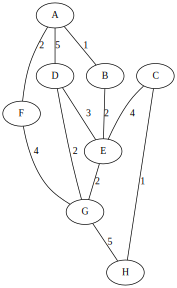

In [ ]:
aristas=[('A','B'), ('A','D'),('A','F'), ('B','E'), ('D','E'), ('D','G'), ('F','G'), ('E','G'), ('C','E'), ('G','H'), ('C','H') ]
G1={'A':{}}
for v1, v2 in aristas:
    make_link(G1, v1, v2)

peso={('A','B'):'1', ('A','D'):'5',('A','F'):'2', ('B','E'):'2', ('D','E'):'3', ('D','G'):'2', ('F','G'):'4', ('E','G'):'2', ('C','E'):'4', ('G','H'):'5', ('C','H'):'1'}

plotear_graficaW(G1, peso, {})

<img src="MST.png" width="50%" height="50%">

## 1.- (10pts) Implementar el algoritmo Kruskal. Encuentra y visualiza el MST del grafo G.

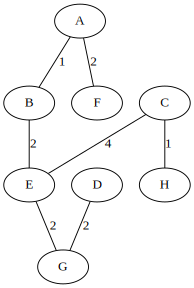

In [ ]:
def MST_Kruskal(G, w):
  A=[]
  SET={}
  z={}
  for v in G:
    SET[v]={v}
  for i in w:
    z[i]=int(w[i])
  wm=sorted(z.items(), key=lambda x: x[1])
  for j in wm:
    if SET[j[0][0]] != SET[j[0][1]]:
      A.append(j[0])
      SET[j[0][0]].update(SET[j[0][1]])
      for k in SET[j[0][0]]:
        SET[k]=SET[j[0][0]]
  return A

B=MST_Kruskal(G1, peso)

ST={'A':{}}
for v1, v2 in B:
  make_link(ST, v1, v2)
weight={}
for ed in B:
  weight[ed]=peso[ed]
plotear_graficaW(ST, weight, {})

## 2.- (10pts) Agrupamiento con espacio maximo

Dada una coleccion de objetos, el problema de **agrupamiento-k** consiste en dividir dichos objetos en k grupos, tal que, objetos que pertenecen al mismo grupo esten "cercanos", y objetos de diferentes grupos esten "lejanos". Para lograr este agrupamiento, es posible definir una funcion de distancia o similitud entre los objetos, con la idea de que objetos a una distancia grande son objectos poco similares.


Definimos el **espacio** de un agrupamiento-k, como la distancia minimia entre cualquier par de puntos que pertenecen a diferente grupo. Un agrupamiento con espacio maximo consiste en encontrar el agrupamiento-k, tal que el distancia minima entre objetos de diferentes grupos es maxima.

<img src="AEM.png" width="80%" height="80%">

**Pregunta**: Describe como se relaciona el problema de MST y el problema de agrupamiento con espacio maximo?


In [ ]:
#Están relacionados mediante la construcción del MST, ya que; por ejemplo con el algoritmo Kruskal; las aristas con mayor peso en el MST se verifican al final, lo cual es la pieza fundamental para poder determinar un agrupamiento con espacio máximo. Para k en los naturales, las últimas k(k-1)/2 aristas que se construyen del MST mediante el algoritmo Kruskal son las aristas que conectan a los k grupos, ya que si vemos a cada grupo como un nodo, estamos lidiando; entonces; con el grafo completo K_k que tiene k(k-1)/2 aristas y podemos afirmar que hay más de k(k-1)/2 aristas porque para cualesquiera dos nodos (elementos del conjunto inicial) se puede obtener su "distancia".

**Implementacion**: Dado el conjuto de puntos del archivo X.txt, utiliza una de tus implementaciones para MST y resuelve le problema de **agrupamiento con espacio maximo**, con $k=2$

**Como funcion de distancia utiliza la distancia euclidiana.**

In [ ]:
import math 

Vert=[(-6.624548801480603655e-02, 9.934211301063136101e-01),
(1.775620178535075588e+00, -1.950033902756007076e-01),
(9.662866119878442683e-01, 8.036274442267132834e-02),
(2.619030303566965284e-02, 1.330394590300640889e-01),
(9.848000493622868223e-01, -5.087811141290906614e-01),
(1.970302831778618646e+00, 2.501147874053196163e-01),
(5.303625989821307840e-01, 7.343457683942306025e-01),
(9.152230719166867257e-01, -5.555080853933012097e-01),
(1.825567099818702077e-02, 2.805352688121756088e-01),
(1.908611695451781776e+00, 2.730268782009683814e-01),
(-5.092238674209619009e-02, 3.800929747788376889e-01),
(1.924879985618508593e+00, -2.144577424157013967e-02),
(1.287288486578837432e+00, -5.382629432536281122e-01),
(8.013592973632740479e-01, 8.470635037816949264e-01),
(7.997813771892156032e-01, 4.602849818951350036e-01),
(-3.503040604641612377e-01, 9.807596015479066454e-01),
(1.926503248595403395e-01, 1.044575993928087199e+00),
(9.557795076913404297e-02, 9.584786149745331274e-01),
(-4.527634493539527405e-01, 8.373201965803933611e-01),
(9.394706139830697467e-01, 5.052273460743713640e-01),
(-8.499418192591570165e-01, 4.410597935352347232e-01),
(3.240978799541974209e-01, -1.955592917534874076e-01),
(9.122479470153422865e-01, 3.222262141981869776e-01),
(7.606039147114918020e-01, -4.711937686904794087e-01),
(-8.951377467021620626e-01, 1.642653548177008260e-01),
(-9.393050091901913312e-01, -4.023757888483851797e-02),
(8.520017071245391538e-01, 3.606280016638502839e-01),
(2.042320059378105679e+00, 3.779859238353911466e-01),
(1.569234167134438085e+00, -2.561490341278395144e-01),
(1.186419480346577515e+00, -4.043303739440267663e-01),
(2.628605759790578755e-01, -1.092265635014453978e-01),
(1.277880619302396825e+00, -5.778229394497774729e-01),
(1.844369255774932048e+00, -3.749512964243251895e-02),
(5.542095941082274546e-01, -3.934985803304780760e-01),
(1.761280037137325297e-02, 4.663925877485832761e-01),
(-1.628022619703524965e-01, 9.906746724110819802e-01),
(3.392962112394691809e-01, 9.345297586465458606e-01),
(9.831315135195961563e-02, 1.533033634713878435e-01),
(1.918490124171724764e-01, -1.391394973740490704e-01),
(9.814486828530121221e-01, -5.289467536302480122e-01),
(1.119763135015991784e+00, 3.858414567600935985e-02),
(3.326308510018108344e-01, -2.055038626007968383e-01),
(-8.951791723965651926e-01, 3.435096472432698222e-01),
(-9.175960003504987084e-01, 4.081041809101239592e-01),
(9.811298477092594839e-01, 2.826275822744863664e-01),
(6.559291987671629354e-01, 9.520070246510276002e-01),
(5.125339576674127207e-01, 1.046502641185924176e+00),
(-7.286009243108366729e-01, 5.883121609011486841e-01),
(-8.228613908945698885e-01, 5.347522705548042321e-01),
(9.083386372145514365e-01, 2.774598413067379532e-01),
(1.762397046684717639e+00, 5.469908931374009922e-03),
(3.512237974389603723e-02, -8.971716645289740111e-02),
(9.350288570800850962e-01, 1.043505341871316383e-01),
(-5.584317066528965423e-01, 7.871599512486082695e-01),
(-9.565610834911203453e-02, 8.143382886658643294e-01),
(4.558465420896472969e-02, 4.208652485348439720e-01),
(7.070316924657861213e-01, 7.263440870964039675e-01),
(-5.297280907003787398e-01, 6.581111268707894313e-01),
(1.257318980256639240e-01, 1.071630746106521093e+00),
(-1.868301149311475326e-02, 4.163769373067258694e-01),
(7.629377088063691303e-01, 6.345893322568414430e-01),
(-3.971988747089711391e-01, 9.327294163979300556e-01),
(4.175745585825546558e-01, -2.950661180305131359e-01),
(1.056345323959143045e-01, -3.789700922290333007e-02),
(1.151486688344001363e+00, -5.382983968288403975e-01),
(1.500147079906008374e+00, -3.020351078099403064e-01),
(-3.891795345122991967e-01, 9.040963342303327543e-01),
(1.575399972428529249e+00, -3.924292671681196554e-01),
(6.517127995675805474e-01, 7.339473348269094366e-01),
(1.889776174902450423e+00, -2.384994918586578194e-01),
(3.221229266687085091e-01, 9.177413938465122101e-01),
(-4.398128395905063215e-01, 9.458226515065097928e-01),
(-9.725384361040887438e-01, 1.691443645884599389e-02),
(1.999065527682730936e+00, 3.140528552509271876e-01),
(2.032438550149441969e+00, 4.422376753881532840e-01),
(5.848052178600291473e-01, -4.944710970573935049e-01),
(2.990228768148552319e-01, 9.953102649399102608e-01),
(1.900098109517387446e+00, 2.488511884955623699e-01),
(7.933051700559162756e-01, -4.778490685896054080e-01),
(1.189482616456985165e+00, -4.880812408353215615e-01),
(-5.670895898624327136e-02, 1.056848878786791124e+00),
(-6.818102090253497227e-01, 7.794907411435445521e-01),
(1.378009308183380854e+00, -3.659962887299247347e-01),
(-9.567872061878002210e-01, 2.644896023206195212e-01),
(-8.310863582200090915e-01, 3.520767621540806247e-01),
(3.338623687565117626e-01, -2.203868257340635683e-01),
(1.446820366482138853e-01, -8.754015161012203977e-03),
(7.218753002309907796e-01, 5.990677893499922746e-01),
(1.743128913679669711e+00, -1.607849738096173986e-01),
(6.669784730087124913e-01, -3.790199724425289962e-01),
(1.706508342517793597e+00, -2.491565076594116079e-01),
(-7.071660074438643750e-01, 7.148756191048555308e-01),
(2.409981555832199085e-01, 9.308529785455926797e-01),
(1.485334480018294823e+00, -4.610780356128525992e-01),
(9.156218323570859408e-01, 5.578716138726774743e-01),
(1.915734409035989128e+00, 3.739129742861511119e-01),
(4.630660653045274855e-01, -4.486477451307005482e-01),
(5.110044850165486041e-01, -3.140161191267308860e-01),
(-1.068022424289844174e+00, 1.967653722016999285e-01),
(-1.030200189744767236e+00, 2.845506215386285898e-01)]

Vertex=['aa', 'ab','ac','ad','ae','af','ag','ah','ai','aj','ak','al','am','an','ao','ap','aq','ar','as','at','au','av','aw','ax','ay','az','ba', 'bb','bc','bd','be','bf','bg','bh','bi','bj','bk','bl','bm','bn','bo','bp','bq','br','bs','bt','bu','bv','bw','bx','by','bz','ca', 'cb','cc','cd','ce','cf','cg','ch','ci','cj','ck','cl','cm','cn','co','cp','cq','cr','cs','ct','cu','cv','cw','cx','cy','cz','da', 'db','dc','dd','de','df','dg','dh','di','dj','dk','dl','dm','dn','do','dp','dq','dr','ds','dt','du','dv']

dist={}
dost={}
Arist=[]
Arost=[]
rel={}
x=0

for v in Vert:
  rel[v]=Vertex[x]
  x+=1

x=0

for v in Vertex:
  for w in Vertex:
    if v != w:
      Arost.append((v,w))

for v in Vert:
  for w in Vert:
    if v != w:
      Arist.append((v,w))

for v in Arist:
  l=(v[0][0]-v[1][0])*(v[0][0]-v[1][0])
  t=(v[0][1]-v[1][1])*(v[0][1]-v[1][1])
  m=math.sqrt(l+t)
  dist[(v[0],v[1])]=m
  dost[(rel[v[0]], rel[v[1]])]=m

print(dist[(Vert[0],Vert[1])])
print(len(Vert))
print(len(Vertex))

#Arost=[]
#for a in Arist:
#  a1=str(a[0][0])
#  a2=str(a[0][1])
#  a3=str(a[1][0])
#  a4=str(a[1][1])
#  Arost.append(('('+a1+','+a2+')','('+a3+','+a4+')')



#print(Arost[0])
GX={'aa':{}}
for v1, v2 in Arost:
    make_link(GX, v1, v2)
C=MST_Kruskal(GX, dost)
print(C)
GC={'aa':{}} #MST
for v1, v2 in C:
  make_link(GC,v1,v2)
plotear_grafica(GC,{})

2.1919904138157684
100
100
[('aa', 'ad'), ('aa', 'ag'), ('aa', 'ai'), ('aa', 'ak'), ('aa', 'an'), ('aa', 'ap'), ('aa', 'aq'), ('aa', 'ar'), ('aa', 'as'), ('aa', 'au'), ('aa', 'bi'), ('aa', 'bj'), ('aa', 'bk'), ('aa', 'bl'), ('aa', 'bt'), ('aa', 'bu'), ('aa', 'bv'), ('aa', 'bw'), ('aa', 'cb'), ('aa', 'cc'), ('aa', 'cd'), ('aa', 'ce'), ('aa', 'cf'), ('aa', 'cg'), ('aa', 'ch'), ('aa', 'ci'), ('aa', 'cj'), ('aa', 'co'), ('aa', 'cq'), ('aa', 'cs'), ('aa', 'ct'), ('aa', 'cy'), ('aa', 'dc'), ('aa', 'dd'), ('aa', 'dg'), ('aa', 'dj'), ('aa', 'dn'), ('aa', 'do'), ('ab', 'ac'), ('ab', 'ae'), ('ab', 'af'), ('ab', 'ah'), ('ab', 'aj'), ('ab', 'al'), ('ab', 'am'), ('ab', 'bb'), ('ab', 'bc'), ('ab', 'bd'), ('ab', 'bf'), ('ab', 'bg'), ('ab', 'bn'), ('ab', 'bo'), ('ab', 'bs'), ('ab', 'bx'), ('ab', 'by'), ('ab', 'ca'), ('ab', 'cm'), ('ab', 'cn'), ('ab', 'cp'), ('ab', 'cr'), ('ab', 'cv'), ('ab', 'cw'), ('ab', 'cz'), ('ab', 'db'), ('ab', 'de'), ('ab', 'dk'), ('ab', 'dm'), ('ab', 'dp'), ('ab', 'dr'), ('ac',

Finalmente, visualiza el conjunto de puntos, dando un color diferente a cada grupo

In [98]:
D=C
max=0
for v in D:
  if dost[v] >=max:
    max=dost[v]
    r=v
D.remove(r)
 #Aristas sin la arista que conecta los dos grupos
print(D)
colores={}
SOT={}

for v in Vertex:
  colores[v]='red'



colores[Vertex[0]]='black'
for v in Vertex:
  SOT[v]={v}
for j in D:
  if SOT[j[0]]!=SOT[j[1]]:
    SOT[j[0]].update(SOT[j[1]])
    for h in SOT[j[0]]:
      SOT[h]=SOT[j[0]]
      colores[h]=colores[j[0]]

C=[('aa', 'ad'), ('aa', 'ag'), ('aa', 'ai'), ('aa', 'ak'), ('aa', 'an'), ('aa', 'ap'), ('aa', 'aq'), ('aa', 'ar'), ('aa', 'as'), ('aa', 'au'), ('aa', 'bi'), ('aa', 'bj'), ('aa', 'bk'), ('aa', 'bl'), ('aa', 'bt'), ('aa', 'bu'), ('aa', 'bv'), ('aa', 'bw'), ('aa', 'cb'), ('aa', 'cc'), ('aa', 'cd'), ('aa', 'ce'), ('aa', 'cf'), ('aa', 'cg'), ('aa', 'ch'), ('aa', 'ci'), ('aa', 'cj'), ('aa', 'co'), ('aa', 'cq'), ('aa', 'cs'), ('aa', 'ct'), ('aa', 'cy'), ('aa', 'dc'), ('aa', 'dd'), ('aa', 'dg'), ('aa', 'dj'), ('aa', 'dn'), ('aa', 'do'), ('ab', 'ac'), ('ab', 'ae'), ('ab', 'af'), ('ab', 'ah'), ('ab', 'aj'), ('ab', 'al'), ('ab', 'am'), ('ab', 'bb'), ('ab', 'bc'), ('ab', 'bd'), ('ab', 'bf'), ('ab', 'bg'), ('ab', 'bn'), ('ab', 'bo'), ('ab', 'bs'), ('ab', 'bx'), ('ab', 'by'), ('ab', 'ca'), ('ab', 'cm'), ('ab', 'cn'), ('ab', 'cp'), ('ab', 'cr'), ('ab', 'cv'), ('ab', 'cw'), ('ab', 'cz'), ('ab', 'db'), ('ab', 'de'), ('ab', 'dk'), ('ab', 'dm'), ('ab', 'dp'), ('ab', 'dr'), ('ac', 'ad'), ('ac', 'ao'), ('ac', 'at'), ('ac', 'av'), ('ac', 'aw'), ('ac', 'ax'), ('ac', 'ba'), ('ac', 'be'), ('ac', 'bh'), ('ac', 'bm'), ('ac', 'bp'), ('ac', 'bz'), ('ac', 'ck'), ('ac', 'cl'), ('ac', 'cx'), ('ac', 'da'), ('ac', 'dh'), ('ac', 'di'), ('ac', 'dl'), ('ac', 'dq'), ('ac', 'ds'), ('ac', 'dt'), ('ad', 'ay'), ('ad', 'az'), ('ad', 'bq'), ('ad', 'br'), ('ad', 'df'), ('ak', 'cu'), ('ak', 'dv'), ('as', 'du')]

plotear_grafica(GC, colores)

#NO SE PORQUE NO JALA:(

[('aa', 'ad'), ('aa', 'ag'), ('aa', 'ai'), ('aa', 'ak'), ('aa', 'an'), ('aa', 'ap'), ('aa', 'aq'), ('aa', 'ar'), ('aa', 'as'), ('aa', 'au'), ('aa', 'bi'), ('aa', 'bj'), ('aa', 'bk'), ('aa', 'bl'), ('aa', 'bt'), ('aa', 'bu'), ('aa', 'bv'), ('aa', 'bw'), ('aa', 'cb'), ('aa', 'cc'), ('aa', 'cd'), ('aa', 'ce'), ('aa', 'cf'), ('aa', 'cg'), ('aa', 'ch'), ('aa', 'ci'), ('aa', 'cj'), ('aa', 'co'), ('aa', 'cq'), ('aa', 'cs'), ('aa', 'ct'), ('aa', 'cy'), ('aa', 'dc'), ('aa', 'dd'), ('aa', 'dj'), ('aa', 'dn'), ('aa', 'do'), ('ab', 'ac'), ('ab', 'ae'), ('ab', 'af'), ('ab', 'ah'), ('ab', 'aj'), ('ab', 'al'), ('ab', 'am'), ('ab', 'bb'), ('ab', 'bc'), ('ab', 'bd'), ('ab', 'bf'), ('ab', 'bg'), ('ab', 'bn'), ('ab', 'bo'), ('ab', 'bs'), ('ab', 'bx'), ('ab', 'by'), ('ab', 'ca'), ('ab', 'cm'), ('ab', 'cn'), ('ab', 'cp'), ('ab', 'cr'), ('ab', 'cv'), ('ab', 'cw'), ('ab', 'cz'), ('ab', 'db'), ('ab', 'de'), ('ab', 'dk'), ('ab', 'dm'), ('ab', 'dp'), ('ab', 'dr'), ('ac', 'ad'), ('ac', 'ao'), ('ac', 'at'), ('ac'